# **Documentation**


---

## **✔️ Answer the questions**
🌈**Based on the provided template, describe the format of the input file (sdf file)**

 `SDFs (structure data files) consist of a series of molfiles joined together, together with some additional information about the compounds
 Structure Data Format (SDF) is a chemical file formats to represent multiple chemical structure records and associated data fields. SDF was developed and published by Molecular Design Limited (MDL) and became the the most widely used standard for importing and exporting information on chemicals. Below is a sample chemical record in SDF format:
`. 

  ```
    -OEChem-02271511112D

    9  8  0     0  0  0  0  0  0999 V2000
    0.5369    0.9749    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4030    0.4749    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2690    0.9749    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8015    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0044    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.9590    1.5118    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.8059    1.2849    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5790    0.4380    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.6649    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  9  1  0  0  0  0
  2  3  1  0  0  0  0
  2  4  1  0  0  0  0
  2  5  1  0  0  0  0
  3  6  1  0  0  0  0
  3  7  1  0  0  0  0
  3  8  1  0  0  0  0
M  END
> <ID>
00001
> <DESCRIPTION>
Solvent produced by yeast-based fermentation of sugars.
$$$$


`Each sample/molecule starts with header which tells about the 
name/title of the compound. Other sections includes information 
about Atom count, version number, connections etc. Atom block tells 
about the elements of the compound. Bond block block tells about the 
bonding structure of the compound. These both blocks 
are used in this assignment to get information about 
the compound and saving them 
in form of edges and nodes. Each node is the atom given 
in the chemical molecule.`




🌈**What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)**

`The input tensors in this network`

```data: The data contains the nodes of the chemical compound in the tokenized form. Nodes for each compound are extracted, then they are tokenized using the tokenizer and finally padding is done using pad_sequence method. The shape for each batch is [batch_size*max_len_nodes], where batch_size is the number of samples in the batch and max_len_nodes is the length of tokenized nodes after padding is done.```

```edge: edge is the input tensor which carries information about connections between atoms. The shape of edge is [sum_of_all_edges,2]. The sum_of_all_edges represents the sum(no. of edges of each sample) of the batch_size. For example in a batch of 3 samples, the number of edges in sample 1: 21, sample 2: 20 and sample 3: 40. So the size of edge tensor would be [81,2].```

```node2graph: It is the input tensor which is used for segmented mean and contains information about segmented ids. The shape for each batch is [batch_size*max_len_nodes], where batch_size is the number of samples in the batch and max_len_nodes is the length of tokenized nodes after padding is done.```

`




🌈**For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?**

`gnn_out: The gnn_out is of shape [batch_size_node_dimension,hidden layers], where batch_size_node_dimension is the dimension of the input data (node)` `vector (dimension of tokenized vector for the complete batch). It represents the aggregation output of the model for each hidden layer.`

`avg: Average takes the segmented mean of the gnn_out based on the segmented ids. For each sample in the batch_size, the output of gnn_out is ``[tokenized_vector_dimension, hidden_layers]. Each sample has one segment id.` `Thus the segment_mean takes the mean of all the output data in the gnn_out output and represents one sample with one number for each hidden layer. The ` `final output of the avg tensor is of shape [batch_size, hidden_layer]. It is a way of collecting information for each sample and representing it in the form of mean data.`


🌈**What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?**

`segment_mean takes the mean of the data which have same segmented ids`

`reduce_mean: computes the mean of elements across dimensions of a tensor given the arguments.`

`pred: The final output (pred) tells about the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.`

🌈**What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?**

`The default template implements the default setting of the number of layers in the gcn network. The default layer are 4 as given in the documentaion. The default message passing method is rgcn (Graph convolution layers). Using multiple gcn helps in incorporating all the graph complexity properly and thus creates a better model.`

`I used 6 mechanism for gcn `

## ✔️**Problem Formulation**

**1-Define the problem**

`problem based on the graph data ,`
 `The task is to predict the anticancer activity of a chemical compound using the chemical structure of the compound. The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1`

---
2- **What is the input**

`The data is in the form of graph which represents the chemical structure of the compound. Each sample of data contains information about the atoms and the connections between atoms of the molecule. So in this problem the features are the atoms and connections.`

---
**3-What is the output**

`The ouput is The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.`

---
**4-What data mining function is required**

`the data mining function required is a binary classification`

---

**5- What could be the challenges**

`first the data unbalanced so we should apply upsampling or downsampling to make the data be balanced `

`second the gcn mechanism layer ,we should use the best one to get high prediction`

`the data is more complex so we should find simple method to deal with it`

`the data has nodes contains of some char so we should tokenize and embedding them`

---
**6-What is the impact**

`Correct classification of chemical compound  saves time and effort in treating the disease`

---

**7-What is an ideal solution?**

`the Ideal solution for this case ,resampling the  data to be balanced and using gcn mechanism (GGNN)`

 `using good optimizer such as Adam Optimizer`

 ---







What is the search space and what is the criteria to determine good/bad hyper-parameters?

the search space that we want to search for it to achieve the bets performance like the type of messaging passing also num if hidden_dim also optimizer and learning rate , batch size, epoches, max_vocab, max_length,.... we tune many time and change these hyperparameter to achieve and reach the model that give us high accuracy but the most imortant less lose.

## **Import Libraries**

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')
# for dealing with arrays
import numpy as np 
#for creating Progress Meters or Progress Bars
from tqdm.notebook import tqdm
#split data into feature and labels 
from sklearn.model_selection import train_test_split

## **Data Preparation**



```
Read SDF format data (structured-data format)
```



In [2]:
'''method to read sdf file
the chemical composition of a molecule is saved as SDF(structure data file) file
sdf file store information about position of individual atom
molecules are delimited by $$$$
the atom block lines start with '    ' and have information about atoms(C,O,N,Cl..)
bond block starts with ' ' and contains info about connection between atoms'''
#define function to read file sdf 
def read_sdf(file):
    with open(file, 'r') as rf: #opening the file in read mode
        content = rf.read()     #reading the contents of the file
    samples = content.split('$$$$') #split samples after every $$$$ 
#method to read each molecule configuration
#s represents one molecule
#define function to split data into nodes and its labels 
    def parse_sample(s):
        lines = s.splitlines()  #splitting the text data to lines
        links = []               #empty array for links
        nodes = []               #empty array for nodes
        label = 0
        for l in lines:          #loop over each line
            if l.strip() == '1.0':#if line has value 1.0 but label equal 1
                label = 1
            if l.strip() == '-1.0':#if line has value -1.0 but label equal 0
                label = 0
            if l.startswith('    '):#if the line start with '    ' set it as a node 
                feature = l.split()
                node = feature[3]
                nodes.append(node)
            elif l.startswith(' '):#if the line has ' ' space white but it in lnk 
                lnk = l.split()
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1, 
                        int(lnk[1])-1, # zero-based index
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label #then returning nodes, links and label
    
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0] #parse_sample for each molecule
                
        
        

## **Steps**

What is the experimental protocol used and how was it carried out?

`The first step is to read the sdf file to get the information about the atoms and their connectivity in the compound. The atoms are described as nodes and connections are described as edges. The read_sdf method is used to read sdf file and the chemical composition of the compound.`

`The nodes(atoms) are given as characters (like ['O','N','Cl'....]). Thus it is treated as sequence of text data and best way to describe the text data sequence to tokenize the data and then adding the embeddig layer.`

`Graph convolutional network is used in this assignment to calculate the probability of the output class. Different methods differ in implementing message passing methods as:`

`R-GCN Method: (Graph convolution layers) Compute new graph states by neural message passing.`

`R-GAT Method: (Relation graph attention network layer) Compute new graph states by neural message passing using attention.`

`R-GIN Method: (Relation Graph Isomorphism Network message propogation layer) Compute new graph states by neural message passing using MLPs for state updates and message computation.`

`GGNN Method: (Gated graph neural network layer) Compute new graph states by neural message passing and gated units on the nodes. This method works best for this problem as given in Aggregation Method 2 below.`

In [3]:
#read train file sdf by calling function read_sdf()
training_set = read_sdf('train.sdf')
#split training data to train and validation by test size =0.15
training_set, validation_set = train_test_split(training_set, test_size=0.15,random_state=35)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [4]:
#read test file sdf by calling function read_sdf()
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

In [5]:
# this show how data look like (nodes and label and links)
print(training_set[1])

(['P', 'O', 'O', 'O', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  7],
       [ 1, 11],
       [ 2, 12],
       [ 4,  9],
       [ 4, 13],
       [ 5,  9],
       [ 5, 14],
       [ 6, 10],
       [ 7,  8],
       [ 7, 10],
       [ 8,  9],
       [11, 15],
       [12, 16],
       [13, 14]]), 0)




---

## **Visualizing/Inspecting a Sample**



```
NetworkX is a Python language software package for the 
creation, manipulation, and study of the structure, dynamics, 
and function of complex networks. It is used to study large 
complex networks represented in form of graphs with nodes and edges. 
Using networkx we can load and store complex networks
```



In [6]:
# --quiet to control the console log level.
!pip install --quiet networkx
import networkx as nx #import networkx to deal with nodes and edges
# data visualisation and manipulation
import matplotlib.pyplot as plt
# Builtin colormaps, colormap handling utilities, and the ScalarMappable mixin.
from matplotlib import cm 
colors = cm.rainbow(np.linspace(0, 1, 50))

In [7]:
#method to visualize the compound graph
#atoms are given as nodes
#the connections are defined as edges
def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0]  #atoms as nodes
    edges = sample[1]  #connections as edges
    
    labeldict={}  #empty dictionary for labels for the nodes
    node_color=[] #empty array for each node color
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i) #adding node to the graph each node as (0,1,2,3..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)])

    # a list of nodes:
    for e in edges: #for each edge
        G.add_edge(e[0], e[1]) #adding egde to the graph from one connection to other connection
        
#drawing the graph with labels for nodes as atoms and connections as edges
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
   #returns graph
    return G

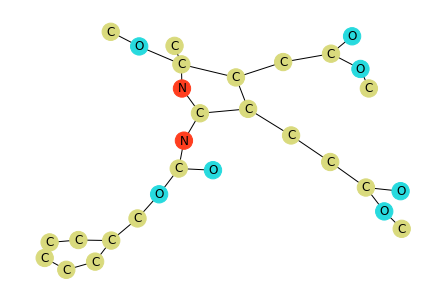

In [8]:
#displaying one sample
plt.clf() #to clear the current figure.
visualize(training_set[60])#visualize first 60 nodes of training set

## **Preprocessing**

**Data Preprocessing**

The dataset used in this experiment contains 121 SMT-LIB files, which can be all transformed to
different Constrained Horn Clauses (CHC) files. From those CHC files, we can draw Horn graphs
and generate initial predicates. The GNN input is a json file that contains essential elements (e.g.
nodes and edges information) for the subsequent training of GNN. 

---

After reading the inputs from the json files, these raw inputs still need more adjustments so that
they can be shaped into appropriate sizes for feeding into the algorithm. The detailed steps are
shown below in Fig 3.2. Firstly, the build_vocabulary function uses the graph node symbols to
build the vocabulary set and token map.
In the vocabulary set, the build_vocabulary function eliminates the repetitive node symbols and
adds in a default set of “unknown symbols”. In the token map, it is a dictionary that contains the
map of the node symbols and a unique number. Then, the variables will go through the
form_GNN_inputs and labels function which uses the token map to obtain the
tokenized_node_label_ids. Tokenized_node_label_ids is the list of the numbers that represents
the node symbols according to the token map. After this stage, the data will be collected in a
dictionary called for later use.

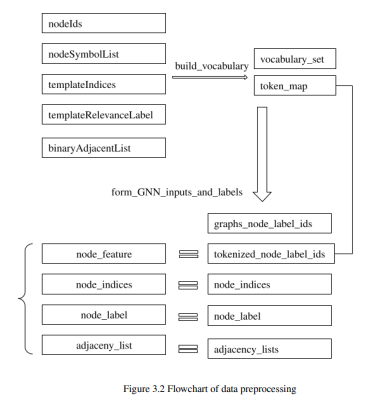

In [9]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer
#vocabulary size
max_vocab = 500 #maximum vocab of words in each sentances 500
max_len = 100 #max length of sentences 


# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [10]:
# pad_sequences is used to ensure that all sequences in a list have the same length.
# By default this is done by padding 0 in the beginning of each sequence until
#each sequence has the same length as the longest sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
#random data set 
import random
random.seed(1)
#define function to prepare single batch from samples 
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]  #nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)#tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post') #pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1]   #shape : (num of samples ,number of nodes)
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)] #s[1]:links,i*max_nodes_len :to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non_zero
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)#concatenate nodes of all samples together 
    all_edges = np.concatenate(edges) #concatenate edges of all samples together (because edge is tuple ,doesn't hae reshape ,output is 20)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])

#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True: #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #return data shuffled 
        l = len(dataset)
        for ndx in range(0, l, batch_size):#loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)  #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break


In [11]:
# showing one batch of data set it has label , nodes and links
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items(): #batch zero has nodes and links 
        print(k)
        print(v)
        pass   #put batch[1] has label of this batch
    print('label', train_batch[1])
    break

data
[5 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 3 3 3 3 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 3 3 3 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
edges
[[ 0 16]
 [ 1  8]
 [ 1  9]
 [ 2  9]
 [ 3 11]
 [ 4  5]
 [ 4 11]
 [ 5 17]
 [ 5 18]
 [ 6  9]
 [ 6 10]
 [ 6 11]
 [ 7  8]
 [ 7 10]
 [ 7 12]
 [ 8 13]
 [12 14]
 [13 15]
 [14 15]
 [14 16]
 [17 19]
 [18 20]
 [19 21]
 [20 21]
 [22 29]
 [22 36]
 [23 33]
 [24 30]
 [24 33]
 [25 26]
 [25 30]
 [26 32]
 [27 34]
 [28 29]
 [28 30]
 [28 32]
 [29 31]
 [31 33]
 [31 34]
 [32 35]
 [44 46]
 [44 55]
 [45 48]
 [46 47]
 [46 48]
 [47 52]
 [47 53]
 [48 51]
 [49 50]
 [49 51]
 [49 56]
 [50 54]
 [50 57]
 [52 54]
 [53 55]
 [56 58]
 [57 59]
 [58 59]
 [66 71]
 [66 73]
 [67 74]
 [67 77]
 [68 71]
 [68 72]
 [69 73]
 [70 76]
 [71 74]
 [72 73]
 [72 76]
 [74 75]
 [75 78]
 [77 78]]
node2grah
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3


**After the data preprocessing**, it is the time to train the model. The main task used in this section is
called node binary classification task. This kind of entity classification is a common use for
RGCN , the prediction task would be predicting the labels of
the template nodes. To show the entire training process and the relationship of the input and
output data

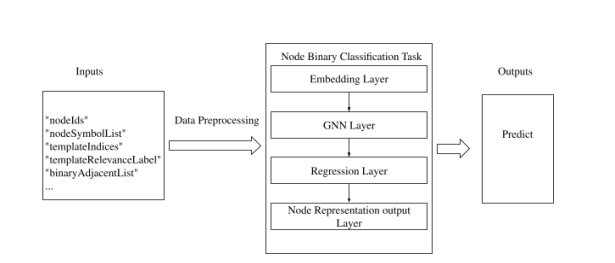

### Graph Neural Networks in TF2


```Graph Network (GN) block and Notation```

Graph neural networks operate on the graphs and structure their computation accordingly [15], a
graph as shown below in Fig 2.3 is formed by nodes and edges. Usually the nodes are denoted as
edges are denoted as and as a graph-level attribute represents global attribute, so

generally a graph is defined as a 3 tuple G = (u, V, E) 
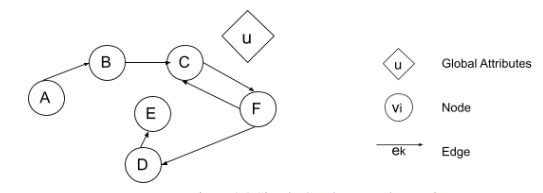


In [12]:
#first installing tf2_gnn
!pip install --quiet tf2_gnn
# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#then we will use its layer in our model train 
from tf2_gnn.layers.gnn import GNN, GNNInput

     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 346 kB 45.8 MB/s 
     |████████████████████████████████| 1.2 MB 39.8 MB/s 
     |████████████████████████████████| 134 kB 42.3 MB/s 
     |████████████████████████████████| 462 kB 48.8 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 178 kB 48.1 MB/s 
     |████████████████████████████████| 3.6 MB 48.4 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 41 kB 535 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


## **Trail_1**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **"GGNN"**

**Graph neural network (GNNs)**

is a way of analysing complex problems by portraying them with
compositions and interactions between the entities [3]. By structuring and reasoning about the
relations, the connectivity of the entities was introduced and utilized in this train of thought. In
this way, by aligning the relational structure




 **Graph Neural Networks in TensorFlow2**

The implementation of the graph neural network in this thesis is an open source framework called
tensorflow-2 graph neural network(tf2-gnn)1
. It provides the implementation and training scripts
of several kinds of graph neural networks based on TensorFlow 2.0 

**Embedding Layer**

there are several layers stacked in the node binary classification task for
processing the data, the first layer is the embedding layer. Normally machine learning models
take vector as input instead of string, therefore the node features need to be vectorized [20]. And
in this thesis in order to represent the words as numerical values, the word embedding method is
used. In this method, the length of each vector that specifies each word can be customized.
Additionally, the dense representation of the words are trainable values, which are also the
weights learnt during the training [20], the embedding will have a
matrix of size vocabulary_size by number of the dimension of output. In this experiment, the
dimension is set as 64 and the number of the vocabulary varies from different graphs
`



**GNN Layer**

Next layer stacked in the predicates selection task is the GNN layer. This prebuilt layer is
included in the tf2-gnn frame. The GNN layer takes four inputs which are node features,
adjacency list, node to graph map and number of the graphs. When calling for the GNN layer in
the task, the embedded node label from the previous embedding layer will be fed into the node
feature. Meanwhile, the adjacency list and node to graph map from inputs will be taken as the
GNN input as well. Number of the graphs implies the number of the graphs in the current batch

Inside the GNN layer there are also several layers such as message passing layer, global exchange
layer and dense layer. In the message passing layer, for implementing the message passing
neural network ,This layer will provide the frame for continuous
neighborhood aggregation by calculating the messages passed from a source node to target node.
In this layer an extended version of the GGNN model is implemented. This model utilizes the
multi-layer perceptrons(MLP) to learn aggregation and updates. The updates node representation

In [13]:
#import tensorflow framework
import tensorflow as tf 
# segment_mean is used to find the mean of elements in segments of a tensor.
from tensorflow.math import segment_mean
#import keras 
from tensorflow import keras
#Input() is used to instantiate a Keras tensor.
from tensorflow.keras import Input, Model
#Embedding layer enables us to convert each word into a fixed length vector of defined size
from tensorflow.keras.layers import Embedding, Dense
#import optimizers
from tensorflow.keras.optimizers import Adam ,SGD,RMSprop
'''

To understand the dimensions:
Let's assume the batch contains 10 samples of data.
The nodes are tokenized using 44 dimension array that is each sample node is of shape [44]
Thus 10 samples are of shape [440] after applying get_batch method
node2graph is also of shape [440] like [0,0,0,0,0,...,1,1,1,1,....2,2,2,....] each number is repeated 44 times [0,0,0,0,... 44 times]
Lets assume edges are of size [257,2]

The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.

'''

data = keras.Input(batch_shape=(None,)) #Input layer for nodes (tokenized text data) 

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1  #calculating number of samples (or min(batch_size,no._of_samples))   

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
#use GGNN as a calculation class 
params["message_calculation_class"]= "GGNN" #Gated Graph Neural Networks
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)
#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

#building model 
#inputs are data,edges and node2graph
#input: dictionary
#output: prediction value from dense layer
model = Model(
    inputs={                   # input 
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred              #output 
)
#printing summary of the model
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                      

`When finished with the GNN layer, the graph representation will be gathered and sent to MLPs to`
`perform the binary classification task. In the compute_task_output method, it implements the`
`regression layer that is formed by dense layers which are simple multilayer perceptrons (MLP).`
`These regression layers are used to perform binary classification task on gathered nodes`

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [16]:
import math
batch_size = 16
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size)#no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)#no. of batches for validation data
#fit model 
history1=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1330/1330 [==============================] - 29s 22ms/step - loss: 0.1930 - auc: 0.6157 - val_loss: 0.1678 - val_auc: 0.6785
Epoch 2/10
1330/1330 [==============================] - 28s 21ms/step - loss: 0.1857 - auc: 0.6664 - val_loss: 0.1669 - val_auc: 0.6994
Epoch 3/10
1330/1330 [==============================] - 37s 28ms/step - loss: 0.1788 - auc: 0.7028 - val_loss: 0.1619 - val_auc: 0.7035
Epoch 4/10
1330/1330 [==============================] - 28s 21ms/step - loss: 0.1739 - auc: 0.7398 - val_loss: 0.1648 - val_auc: 0.7303
Epoch 5/10
1330/1330 [==============================] - 28s 21ms/step - loss: 0.1717 - auc: 0.7527 - val_loss: 0.1553 - val_auc: 0.7362
Epoch 6/10
1330/1330 [==============================] - 48s 36ms/step - loss: 0.1707 - auc: 0.7639 - val_loss: 0.1569 - val_auc: 0.7480
Epoch 7/10
1330/1330 [==============================] - 45s 34ms/step - loss: 0.1680 - auc: 0.7793 - val_loss: 0.1624 - val_auc: 0.7500
Epoch 8/10
1330/1330 [==========================

### **PLot AUC** 

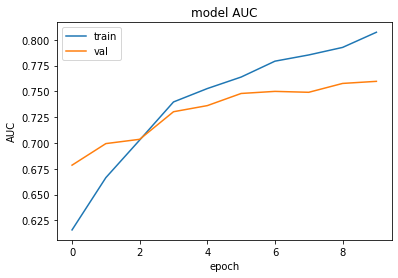

In [19]:
plt.plot(history1.history['auc'])
plt.plot(history1.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Loss**

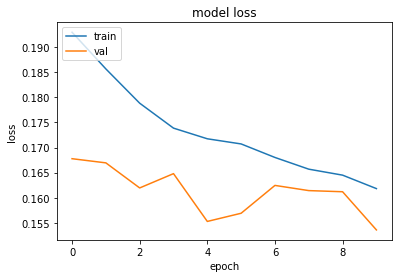

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [21]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=22, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [22]:
len(y_pred)

12326

In [23]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_1.csv')

## **Observation_1**

* as we see when I used Gated Graph Neural Networks the accuracy was increased

* loss was decreased

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 16 and epoch 10 

* I get score in private 0.86608 / public  0.85802

* So GGNN is the best calculationn method 





---

## **Trail_2**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **RGCN**

In [24]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGCN" #Relational Graph Convolutional Networks 
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [27]:
batch_size = 15
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)
#fit Model
history2=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=15, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1418/1418 [==============================] - 28s 19ms/step - loss: 0.1917 - auc: 0.6506 - val_loss: 0.1703 - val_auc: 0.6726
Epoch 2/10
1418/1418 [==============================] - 33s 23ms/step - loss: 0.1874 - auc: 0.6801 - val_loss: 0.1681 - val_auc: 0.6946
Epoch 3/10
1418/1418 [==============================] - 34s 24ms/step - loss: 0.1826 - auc: 0.7073 - val_loss: 0.1657 - val_auc: 0.7102
Epoch 4/10
1418/1418 [==============================] - 30s 21ms/step - loss: 0.1806 - auc: 0.7170 - val_loss: 0.1794 - val_auc: 0.7120
Epoch 5/10
1418/1418 [==============================] - 35s 25ms/step - loss: 0.1767 - auc: 0.7407 - val_loss: 0.1632 - val_auc: 0.7318
Epoch 6/10
1418/1418 [==============================] - 32s 23ms/step - loss: 0.1759 - auc: 0.7449 - val_loss: 0.1643 - val_auc: 0.7597
Epoch 7/10
1418/1418 [==============================] - 34s 24ms/step - loss: 0.1749 - auc: 0.7500 - val_loss: 0.1632 - val_auc: 0.7510
Epoch 8/10
1418/1418 [==========================

### **AUC_plot**

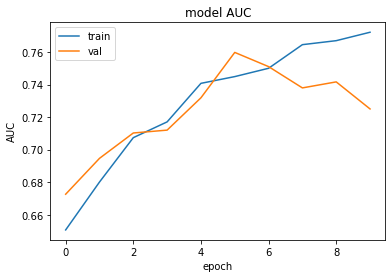

In [28]:
plt.plot(history2.history['auc'])
plt.plot(history2.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Loss_plot**

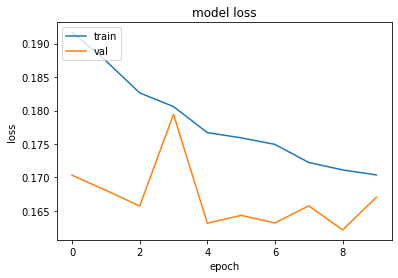

In [29]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [30]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [31]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('Trail2.csv')

## **Observation_2**

* as we see when I used Relational Graph Convolutional Networks,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 16 and epoch 10 

* I get score in private Score: 0.77139 /Public score: 0.78040

* So  RGCN is not best calculationn method 




---

## **Trail_3**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **RGAT**

In [32]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGAT" #Relational Graph Attention Networks 
params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [34]:
batch_size = 300
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history3=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=6,
    validation_data=gen_batch(
        validation_set, batch_size=300, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/6
71/71 [==============================] - 52s 212ms/step - loss: 0.4948 - auc: 0.4753 - val_loss: 0.2606 - val_auc: 0.3731
Epoch 2/6
71/71 [==============================] - 13s 187ms/step - loss: 0.2846 - auc: 0.3569 - val_loss: 0.2552 - val_auc: 0.3660
Epoch 3/6
71/71 [==============================] - 13s 179ms/step - loss: 0.2798 - auc: 0.3614 - val_loss: 0.2436 - val_auc: 0.3674
Epoch 4/6
71/71 [==============================] - 13s 178ms/step - loss: 0.2599 - auc: 0.3603 - val_loss: 0.2074 - val_auc: 0.4221
Epoch 5/6
71/71 [==============================] - 14s 192ms/step - loss: 0.2226 - auc: 0.4660 - val_loss: 0.1946 - val_auc: 0.5963
Epoch 6/6
71/71 [==============================] - 13s 183ms/step - loss: 0.1994 - auc: 0.6051 - val_loss: 0.1911 - val_auc: 0.5961


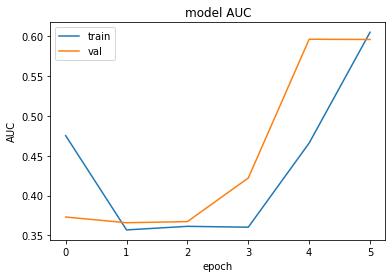

In [35]:
plt.plot(history3.history['auc'])
plt.plot(history3.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

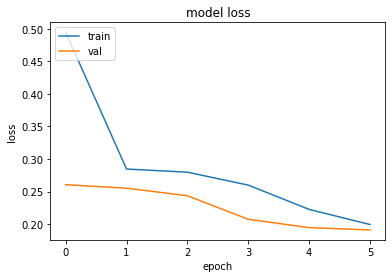

In [36]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [37]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [38]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_3.csv')

## **Observation_3**

* as we see when I used Relational Graph Attention Networks,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 300 and epoch 6

* I get Score: 0.66903 /Public score: 0.69668

* So  RGAT is not best calculationn method 



---

## **Trail_4**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **RGIN**

In [39]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGIN" #Relational Graph Isomorphism Networks 
params["num_aggr_MLP_hidden_layers"]=4
params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [41]:
batch_size = 400
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history4=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=400, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
54/54 [==============================] - 15s 103ms/step - loss: 0.6154 - auc: 0.4871 - val_loss: 0.3119 - val_auc: 0.3679
Epoch 2/20
54/54 [==============================] - 4s 77ms/step - loss: 0.2866 - auc: 0.3980 - val_loss: 0.1940 - val_auc: 0.5370
Epoch 3/20
54/54 [==============================] - 4s 76ms/step - loss: 0.2079 - auc: 0.5609 - val_loss: 0.2168 - val_auc: 0.6236
Epoch 4/20
54/54 [==============================] - 4s 76ms/step - loss: 0.2027 - auc: 0.5913 - val_loss: 0.1743 - val_auc: 0.6308
Epoch 5/20
54/54 [==============================] - 4s 76ms/step - loss: 0.1946 - auc: 0.6337 - val_loss: 0.1776 - val_auc: 0.6483
Epoch 6/20
54/54 [==============================] - 4s 70ms/step - loss: 0.1964 - auc: 0.6291 - val_loss: 0.1858 - val_auc: 0.6937
Epoch 7/20
54/54 [==============================] - 4s 67ms/step - loss: 0.1887 - auc: 0.6687 - val_loss: 0.1631 - val_auc: 0.6854
Epoch 8/20
54/54 [==============================] - 4s 66ms/step - loss: 0.1899 -

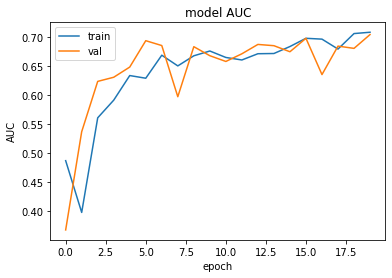

In [42]:
plt.plot(history4.history['auc'])
plt.plot(history4.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

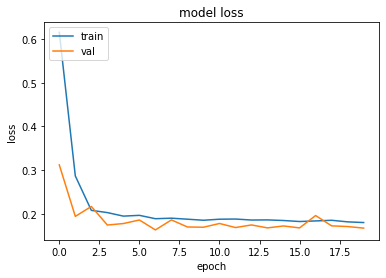

In [43]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [44]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [45]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_4.csv')

## **Observation_4**

* as we see when I used Relational Graph Isomorphism Networks ,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 400 and epoch 20

* So  RGIN is not best calculationn method 



---

## **Trail_5**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **GNN-Edge-MLP**

In [46]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "GNN_Edge_MLP" #Graph Neural Network with Edge MLPs
# params["num_aggr_MLP_hidden_layers"]=4
# params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_4/SegmentMean:0', description="created by layer 'tf.math.segment_mean_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/Sigmoid:0', description="created by layer 'dense_4'")
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [47]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( ),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [48]:
batch_size = 45
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history5=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=45, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
473/473 [==============================] - 13s 22ms/step - loss: 0.2894 - auc: 0.3991 - val_loss: 0.1950 - val_auc: 0.5188
Epoch 2/20
473/473 [==============================] - 10s 20ms/step - loss: 0.2012 - auc: 0.5837 - val_loss: 0.1735 - val_auc: 0.6088
Epoch 3/20
473/473 [==============================] - 10s 20ms/step - loss: 0.1926 - auc: 0.6332 - val_loss: 0.1698 - val_auc: 0.6906
Epoch 4/20
473/473 [==============================] - 10s 21ms/step - loss: 0.1900 - auc: 0.6575 - val_loss: 0.1778 - val_auc: 0.7081
Epoch 5/20
473/473 [==============================] - 10s 21ms/step - loss: 0.1863 - auc: 0.6734 - val_loss: 0.1701 - val_auc: 0.6926
Epoch 6/20
473/473 [==============================] - 10s 21ms/step - loss: 0.1835 - auc: 0.6847 - val_loss: 0.1737 - val_auc: 0.6903
Epoch 7/20
473/473 [==============================] - 10s 21ms/step - loss: 0.1830 - auc: 0.6973 - val_loss: 0.1744 - val_auc: 0.7376
Epoch 8/20
473/473 [==============================] - 10s 21ms

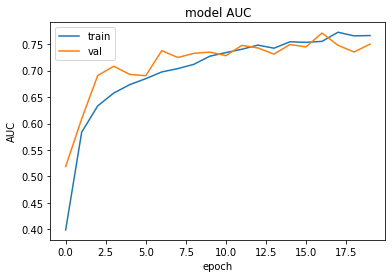

In [49]:
plt.plot(history5.history['auc'])
plt.plot(history5.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

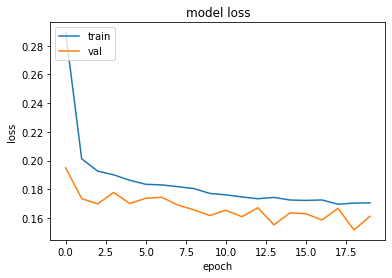

In [50]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [51]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=45, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [52]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_5.csv')

## **Observation_5**

* as we see when I used  Graph Neural Network with Edge MLPs ,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 45 and epoch 20

* So  GNN_Edge_MLP is not best calculationn method 



---

## **Trail_6**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **GNN_FiLM**

In [53]:
from tensorflow.python.ops.gen_math_ops import segment_max
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "GNN_FiLM" 
params["film_parameter_MLP_hidden_layers"]=12
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max/SegmentMax:0', description="created by layer 'tf.math.segment_max'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []               

In [54]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( ),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [55]:
batch_size = 150
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history6=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=9,
    validation_data=gen_batch(
        validation_set, batch_size=150, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/9
142/142 [==============================] - 23s 81ms/step - loss: 0.2727 - auc: 0.5198 - val_loss: 0.1818 - val_auc: 0.6412
Epoch 2/9
142/142 [==============================] - 9s 65ms/step - loss: 0.2014 - auc: 0.5845 - val_loss: 0.1835 - val_auc: 0.6214
Epoch 3/9
142/142 [==============================] - 7s 51ms/step - loss: 0.1942 - auc: 0.6164 - val_loss: 0.1645 - val_auc: 0.7228
Epoch 4/9
142/142 [==============================] - 6s 46ms/step - loss: 0.1888 - auc: 0.6646 - val_loss: 0.1958 - val_auc: 0.6804
Epoch 5/9
142/142 [==============================] - 6s 45ms/step - loss: 0.1833 - auc: 0.6882 - val_loss: 0.1620 - val_auc: 0.7404
Epoch 6/9
142/142 [==============================] - 6s 44ms/step - loss: 0.1831 - auc: 0.6884 - val_loss: 0.1695 - val_auc: 0.7370
Epoch 7/9
142/142 [==============================] - 6s 44ms/step - loss: 0.1780 - auc: 0.7241 - val_loss: 0.1591 - val_auc: 0.7325
Epoch 8/9
142/142 [==============================] - 6s 44ms/step - loss: 0

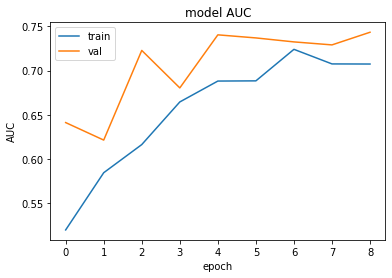

In [56]:
plt.plot(history6.history['auc'])
plt.plot(history6.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

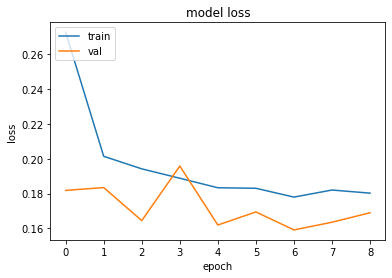

In [57]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [58]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=150, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [59]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_6.csv')

## **Observation_6**

* as we see when I used  Graph Neural Networks with Feature-wise Linear Modulation  ,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 150 and epoch 9

* So  GNN-FiLM is not best calculationn method 



---

## **Trail_7**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* also i will use RMSprop optimizer not adam

In [60]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_max_1/SegmentMax:0', description="created by layer 'tf.math.segment_max_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [61]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [62]:
batch_size = 150
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history7=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=9,
    validation_data=gen_batch(
        validation_set, batch_size=150, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/9
142/142 [==============================] - 9s 44ms/step - loss: 0.2786 - auc: 0.4903 - val_loss: 0.1775 - val_auc: 0.5036
Epoch 2/9
142/142 [==============================] - 5s 37ms/step - loss: 0.1946 - auc: 0.6125 - val_loss: 0.1710 - val_auc: 0.6659
Epoch 3/9
142/142 [==============================] - 5s 36ms/step - loss: 0.1907 - auc: 0.6431 - val_loss: 0.1693 - val_auc: 0.6706
Epoch 4/9
142/142 [==============================] - 5s 36ms/step - loss: 0.1891 - auc: 0.6557 - val_loss: 0.1765 - val_auc: 0.6851
Epoch 5/9
142/142 [==============================] - 5s 37ms/step - loss: 0.1852 - auc: 0.6899 - val_loss: 0.1581 - val_auc: 0.6964
Epoch 6/9
142/142 [==============================] - 5s 34ms/step - loss: 0.1838 - auc: 0.6882 - val_loss: 0.1792 - val_auc: 0.6488
Epoch 7/9
142/142 [==============================] - 4s 30ms/step - loss: 0.1839 - auc: 0.6823 - val_loss: 0.1610 - val_auc: 0.6758
Epoch 8/9
142/142 [==============================] - 4s 30ms/step - loss: 0.

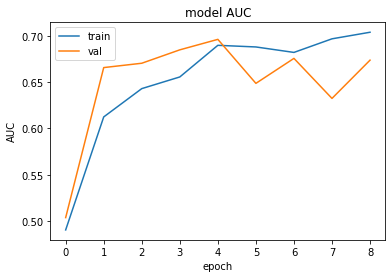

In [63]:
plt.plot(history7.history['auc'])
plt.plot(history7.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

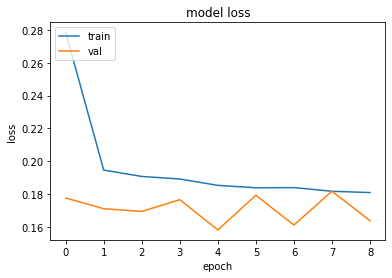

In [65]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [66]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=150, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [67]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_7.csv')

## **Observation_7**

* as we see when I used  default layer and RMSprop optimizer ,the accuracy was not increased enough

* loss still same value 

* when I used RMSprop optimizer I noticed that accuracy not increased clearly 

* with batch size 150 and epoch 9

* So  default layer not the best 



---

## **Trail_8**

Upsampling

`Upsampling refers to manually adding data samples to the minority classes in order to create a more balanced dataset.`

`Upsampling By Copying Minority Class Instances`

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* `also i will use adam optimizer`
*` I will use upsampling method to make the data balanced`

* in this trail I will use message_calculation_class :**GGNN**

In [68]:
#read train file sdf by calling function read_sdf()
training_set = read_sdf('train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [69]:
np.unique(np.array(training_set)[:,2],return_counts=True)

(array([0, 1], dtype=object), array([23806,  1218]))

In [70]:
from pandas.core.frame import DataFrame
DataFrame(np.array(training_set))

,0,1,2
0,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 11], [3, 7], [4...",0
1,"[O, O, O, O, O, O, N, N, N, C, C, C, C, C, C, ...","[[0, 6], [0, 15], [1, 15], [2, 7], [3, 8], [4,...",0
2,"[F, F, F, O, O, O, O, O, N, N, C, C, C, C, C, ...","[[0, 19], [1, 19], [2, 19], [3, 16], [4, 28], ...",0
3,"[Cl, S, S, O, O, O, O, N, N, N, N, C, C, C, C,...","[[0, 12], [1, 15], [1, 18], [2, 4], [2, 5], [2...",0
4,"[S, O, O, N, N, N, N, N, N, C, C, C, C, C, C, ...","[[0, 1], [0, 2], [0, 5], [0, 9], [3, 4], [3, 1...",0
...,...,...,...
25019,"[O, O, O, O, O, O, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 12], [3, 13], [...",0
25020,"[O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, ...","[[0, 9], [1, 11], [2, 16], [2, 19], [3, 16], [...",0
25021,"[O, O, O, O, O, O, O, O, O, N, C, C, C, C, C, ...","[[0, 12], [0, 16], [1, 10], [2, 11], [3, 15], ...",0
25022,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 11], [0, 12], [1, 21], [1, 27], [2, 22], ...",0


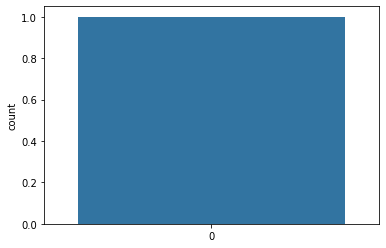

In [71]:
#check balance of data
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.countplot(DataFrame(np.array(training_set)[:,2]).all())
g.set_xticklabels([0,1])
plt.show()

In [72]:
print(DataFrame(np.array(training_set)[:,2]).value_counts())

0    23806
1     1218
dtype: int64


In [73]:
DataFrame(np.array(training_set)).rename(columns = {0:'nodes', 1:'edges',2:'label'}, inplace = True)

In [74]:
DataFrame(np.array(training_set))[2]

0        0
1        0
2        0
3        0
4        0
        ..
25019    0
25020    0
25021    0
25022    0
25023    0
Name: 2, Length: 25024, dtype: object

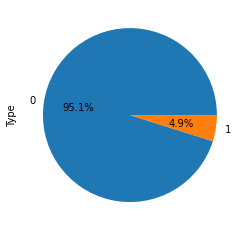

In [75]:
DataFrame(np.array(training_set)).groupby(2).size().plot(kind='pie',
                                       y = DataFrame(np.array(training_set))[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [76]:
label_0 = DataFrame(np.array(training_set))[DataFrame(np.array(training_set))[2] == 0]
label_1 = DataFrame(np.array(training_set))[DataFrame(np.array(training_set))[2] == 1]
print(label_0.shape)
print(label_1.shape)

(23806, 3)
(1218, 3)


In [77]:
X_train = pd.DataFrame(np.array(training_set)[:,:-1])
y_train = pd.DataFrame(np.array(training_set)[:,2])

In [78]:
from sklearn.utils import resample

resampling = X_train.copy()
resampling[2] = y_train.values
class_0 = resampling[resampling[2]==0]
class_1 = resampling[resampling[2]==1]
class_1_after = resample(class_1, replace=True,n_samples=23806)
df_upsampled = pd.concat([class_0, class_1_after])

In [79]:
# Display new class counts
df_upsampled[2].value_counts()

0    23806
1    23806
Name: 2, dtype: int64

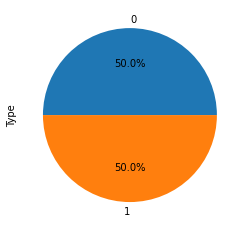

In [80]:
#visualize data 
df_upsampled.groupby(2).size().plot(kind='pie',
                                       y = df_upsampled[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [81]:
training_set = df_upsampled.values.tolist() # to return data from dataframe to arry

## **Visualizing/Inspecting a Sample**

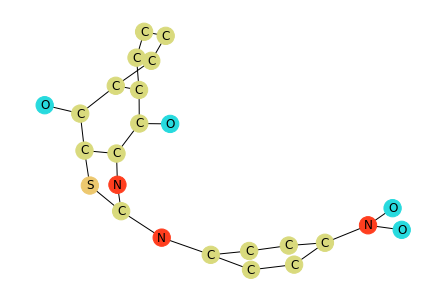

In [82]:
plt.clf()
visualize(training_set[0])

In [83]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 47612
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


In [84]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():          #k: labels, v: values
        print(k)
        print(v)
        #print(len(v))
        pass
    print('label', train_batch[1])
    break


data
[5 5 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
edges
[[  0  16]
 [  1  17]
 [  2   7]
 [  2  15]
 [  3  10]
 [  3  18]
 [  4  10]
 [  5  15]
 [  6   9]
 [  6  15]
 [  7  16]
 [  8  10]
 [  8  13]
 [  8  14]
 [  9  11]
 [  9  12]
 [ 11  13]
 [ 12  14]
 [ 16  17]
 [ 18  19]
 [ 92 123]
 [ 92 126]


In [85]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
params["message_calculation_class"]= "GGNN"
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max_2/SegmentMax:0', description="created by layer 'tf.math.segment_max_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_7/Sigmoid:0', description="created by layer 'dense_7'")
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [86]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

In [88]:

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history8=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
2976/2976 [==============================] - 84s 28ms/step - loss: 0.5926 - auc: 0.7457 - val_loss: 0.6224 - val_auc: 0.8123
Epoch 2/10
2976/2976 [==============================] - 65s 22ms/step - loss: 0.4976 - auc: 0.8388 - val_loss: 0.4509 - val_auc: 0.8448
Epoch 3/10
2976/2976 [==============================] - 62s 21ms/step - loss: 0.4455 - auc: 0.8748 - val_loss: 0.4093 - val_auc: 0.8909
Epoch 4/10
2976/2976 [==============================] - 63s 21ms/step - loss: 0.3960 - auc: 0.9028 - val_loss: 0.3220 - val_auc: 0.9185
Epoch 5/10
2976/2976 [==============================] - 62s 21ms/step - loss: 0.3491 - auc: 0.9250 - val_loss: 0.3279 - val_auc: 0.9257
Epoch 6/10
2976/2976 [==============================] - 62s 21ms/step - loss: 0.3117 - auc: 0.9399 - val_loss: 0.3208 - val_auc: 0.9347
Epoch 7/10
2976/2976 [==============================] - 63s 21ms/step - loss: 0.2786 - auc: 0.9516 - val_loss: 0.2433 - val_auc: 0.9553
Epoch 8/10
2976/2976 [==========================

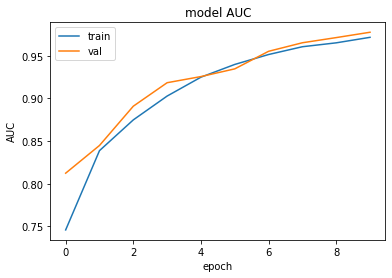

In [89]:
plt.plot(history8.history['auc'])
plt.plot(history8.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

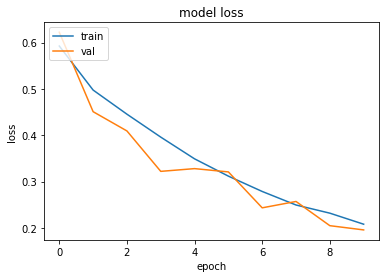

In [90]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [91]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [92]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_8.csv')


## **Observation_8**

* `as we see when I used  default layer and Adam optimizer ,the accuracy was  increased` 

* `loss still was decreased `

*` when I used adam optimizer I noticed that accuracy was increased clearly` 

* `with batch size 16 and epoch 8`

* `I used upsambling method and GGNN layer ,so the accuracy was increased than data unbalanced `

`Score: 0.88321
Public score: 0.88109`



---


## **Trail_9**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* `also i will use adam optimizer`
*` I will use upsampling method to make the data balanced`

* `in this trail I will use default layer with upsamoling method and still use adam optimizer` 

In [93]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
# params["hidden_dim"] = 32
# params["message_calculation_class"]= "GGNN"
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_8/StatefulPartitionedCall:0', description="created by layer 'gnn_8'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_max_3/SegmentMax:0', description="created by layer 'tf.math.segment_max_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_8/Sigmoid:0', description="created by layer 'dense_8'")
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [94]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

In [96]:
batch_size = 200
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history9=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=200, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
239/239 [==============================] - 11s 45ms/step - loss: 0.5759 - auc: 0.7655 - val_loss: 0.4944 - val_auc: 0.7461
Epoch 2/10
239/239 [==============================] - 9s 36ms/step - loss: 0.5688 - auc: 0.7725 - val_loss: 0.5666 - val_auc: 0.7470
Epoch 3/10
239/239 [==============================] - 8s 35ms/step - loss: 0.5657 - auc: 0.7758 - val_loss: 0.4810 - val_auc: 0.7537
Epoch 4/10
239/239 [==============================] - 8s 35ms/step - loss: 0.5630 - auc: 0.7786 - val_loss: 0.6106 - val_auc: 0.7613
Epoch 5/10
239/239 [==============================] - 8s 35ms/step - loss: 0.5595 - auc: 0.7821 - val_loss: 0.5423 - val_auc: 0.7674
Epoch 6/10
239/239 [==============================] - 8s 34ms/step - loss: 0.5567 - auc: 0.7845 - val_loss: 0.5383 - val_auc: 0.7634
Epoch 7/10
239/239 [==============================] - 8s 35ms/step - loss: 0.5539 - auc: 0.7876 - val_loss: 0.6026 - val_auc: 0.7778
Epoch 8/10
239/239 [==============================] - 9s 36ms/step -

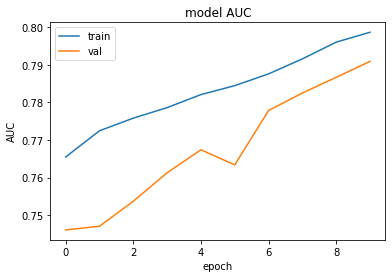

In [97]:
plt.plot(history9.history['auc'])
plt.plot(history9.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

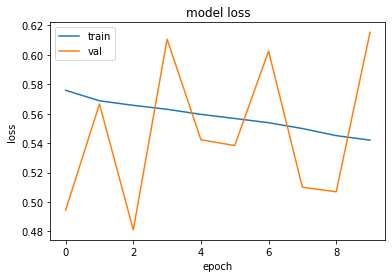

In [98]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [99]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [100]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_9.csv')

## **Observation_9**

* `as we see when I used  default layer and Adam optimizer ,the accuracy was  increased` 

* `loss still was decreased `

*` when I used adam optimizer I noticed that accuracy was increased clearly` 

* `with batch size 16 and epoch 8`

* `I used upsambling method ,so the accuracy was increased than  data unbalanced `

* `In this trail i used default layer but use upsampling method ,so the accuracy not increased enough but still better than data unbalanced `



---

## **Trail_10**

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* `also i will use adam optimizer`
*` I will use upsampling method to make the data balanced`

* `in this trail I will use  layer of gnn but i will tune them by another values too ,I will use  upsamoling method and still use adam optimizer` 
* `I will set message_calculation_class= "GGNN"`
* `I will set hidden_dim =32`
* `I will set num_layers = 8`
* `I will set dense_every_num_layers = 4`
* `set residual_every_num_layers =4`
* `set layer_input_dropout_rate =0.001`
* `set global_exchange_mode = "mlp" `
* `set global_exchange_every_num_layers =3`
* `set global_exchange_dropout_rate =0.3`


In [101]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
params["message_calculation_class"]= "GGNN"
# params["initial_node_representation_activation"]= "tanh"
# params["dense_intermediate_layer_activation"]= "tanh"
params["num_layers"]= 8
params["dense_every_num_layers"]= 4
params["residual_every_num_layers"]= 4
params["layer_input_dropout_rate"]= 0.001
          
params["global_exchange_mode"]= "mlp"
params["global_exchange_every_num_layers"]=3

params["global_exchange_dropout_rate"]=0.3
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_9/StatefulPartitionedCall:0', description="created by layer 'gnn_9'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max_4/SegmentMax:0', description="created by layer 'tf.math.segment_max_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_9/Sigmoid:0', description="created by layer 'dense_9'")
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [102]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

In [103]:
batch_size = 160
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history10=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=160, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
298/298 [==============================] - 30s 69ms/step - loss: 0.6394 - auc: 0.6786 - val_loss: 0.8158 - val_auc: 0.7397
Epoch 2/10
298/298 [==============================] - 20s 66ms/step - loss: 0.5967 - auc: 0.7380 - val_loss: 0.6871 - val_auc: 0.7719
Epoch 3/10
298/298 [==============================] - 20s 67ms/step - loss: 0.5686 - auc: 0.7726 - val_loss: 0.5969 - val_auc: 0.8044
Epoch 4/10
298/298 [==============================] - 20s 68ms/step - loss: 0.5364 - auc: 0.8060 - val_loss: 0.4878 - val_auc: 0.8165
Epoch 5/10
298/298 [==============================] - 20s 68ms/step - loss: 0.5065 - auc: 0.8327 - val_loss: 0.5293 - val_auc: 0.8452
Epoch 6/10
298/298 [==============================] - 20s 68ms/step - loss: 0.4777 - auc: 0.8543 - val_loss: 0.4025 - val_auc: 0.8602
Epoch 7/10
298/298 [==============================] - 20s 66ms/step - loss: 0.4513 - auc: 0.8716 - val_loss: 0.3756 - val_auc: 0.8715
Epoch 8/10
298/298 [==============================] - 20s 67ms

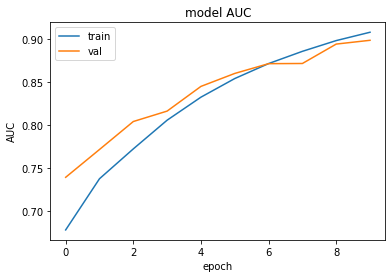

In [104]:
plt.plot(history10.history['auc'])
plt.plot(history10.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

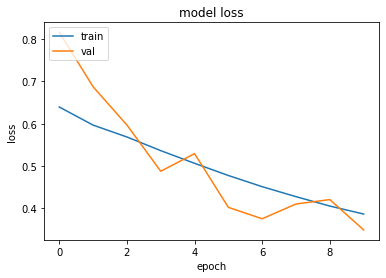

In [105]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [106]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [107]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_10.csv')

## **Observation_10**

* `as we see when I used  default layer and Adam optimizer ,the accuracy was  increased` 

* `loss still was decreased `

*` when I used adam optimizer I noticed that accuracy was increased clearly` 

* `with batch size 16 and epoch 8`

* `I used upsambling method ,so the accuracy was increased than  data unbalanced `

* `so the accuracy not increased enough but still better than data unbalanced `
* `I notice that the default layer with GGNN and Upsampling method is the best` 



---